In [37]:
from colorama import Fore, Back, Style
from random import choice
import numpy as np
import matplotlib.pyplot as plt
import cv2
import argparse

import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [38]:
def statement(stmnt):
    print(Fore.YELLOW, Back.LIGHTBLACK_EX, Style.BRIGHT, stmnt, Style.RESET_ALL)

In [39]:
mnist = tf.keras.datasets.mnist

In [40]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Loading the data into training and testing samples

In [41]:
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

In [42]:
xtrain.shape

(60000, 28, 28)

In [43]:
xtest.shape

(10000, 28, 28)

# Crosschecking training and testing data with corresponding labels

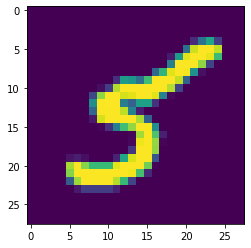

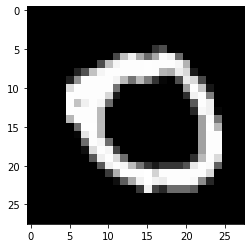

   Label Value At Index(11785) For Training Data = 5
    Label Value At Index(4082) For Testing Data = 0 


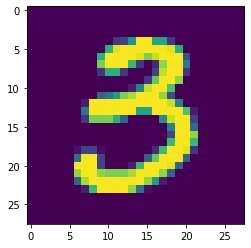

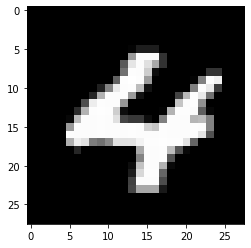

   Label Value At Index(10527) For Training Data = 3
    Label Value At Index(6742) For Testing Data = 4 


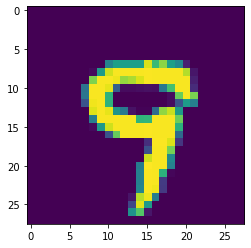

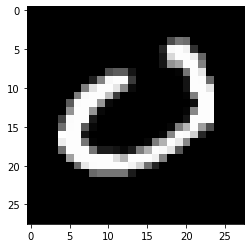

   Label Value At Index(55595) For Training Data = 9
    Label Value At Index(8212) For Testing Data = 0 


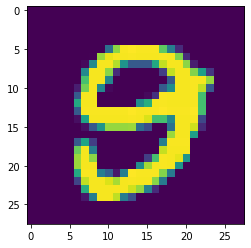

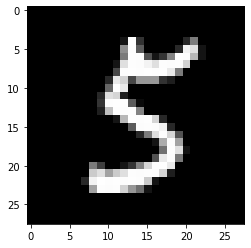

   Label Value At Index(9428) For Training Data = 9
    Label Value At Index(9428) For Testing Data = 5 


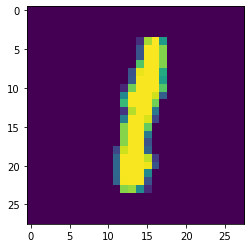

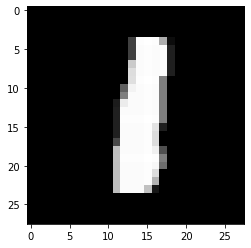

   Label Value At Index(19751) For Training Data = 1
    Label Value At Index(6063) For Testing Data = 1 


In [44]:
for j in range(5):
    i = choice(range(60000))
    plt.imshow(xtrain[i])
    plt.show()
    try:
        k = i
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    except IndexError:
        k = choice(range(10000))
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    plt.show()
    stmnt = f'''label value at index({i}) for training data = {ytrain[i]}
    label value at index({k}) for testing data = {ytest[k]}'''.title()
    statement(stmnt)

In [45]:
xtrain.shape

(60000, 28, 28)

# Normalizing the data

In [46]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

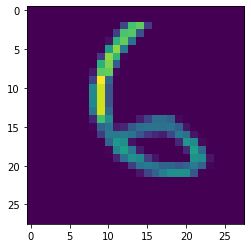

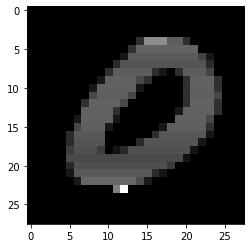

   Label Value At Index(47300) For Training Data = 6
    Label Value At Index(8007) For Testing Data = 0 


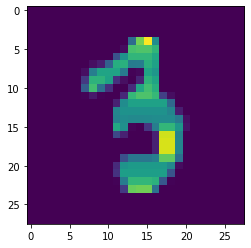

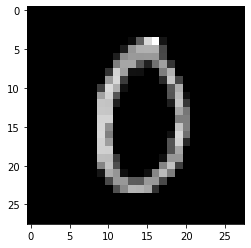

   Label Value At Index(37626) For Training Data = 3
    Label Value At Index(1619) For Testing Data = 0 


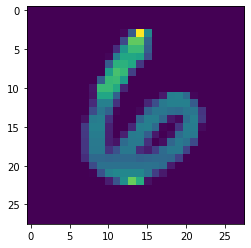

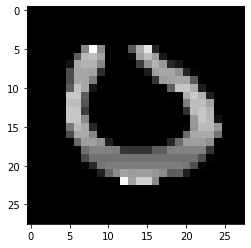

   Label Value At Index(51089) For Training Data = 6
    Label Value At Index(9425) For Testing Data = 0 


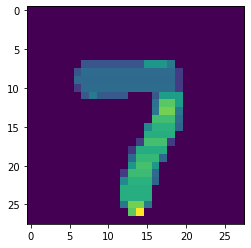

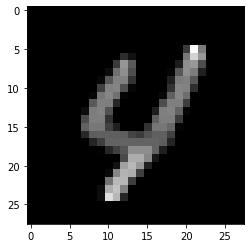

   Label Value At Index(29373) For Training Data = 7
    Label Value At Index(8886) For Testing Data = 4 


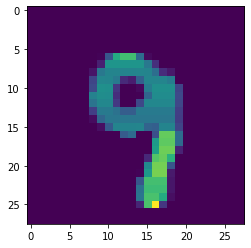

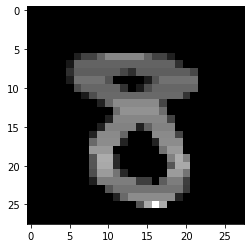

   Label Value At Index(28582) For Training Data = 9
    Label Value At Index(4041) For Testing Data = 8 


In [47]:
for j in range(5):
    i = choice(range(60000))
    plt.imshow(xtrain[i])
    plt.show()
    try:
        k = i
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    except IndexError:
        k = choice(range(10000))
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    plt.show()
    stmnt = f'''label value at index({i}) for training data = {ytrain[i]}
    label value at index({k}) for testing data = {ytest[k]}'''.title()
    statement(stmnt)

# Reshaping the data with last point having the color setting set to grayscale

In [48]:
img = 28
xtrain = np.array(xtrain).reshape(-1, img, img, 1)
xtest = np.array(xtest).reshape(-1, img, img, 1)
statement(f'training shape : {xtrain.shape}'.title())
statement(f'testing shape : {xtest.shape}'.title())

   Training Shape : (60000, 28, 28, 1) 
   Testing Shape : (10000, 28, 28, 1) 


# Initializing ImageDataGenerator

In [49]:
# # datagen = ImageDataGenerator(
# #         rotation_range=20,
# #         width_shift_range=0.3,
# #         height_shift_range=0.3,
# #         zoom_range=[.6,1.5],
# #         brightness_range=[0.2,1.3],
# #         shear_range=0.3
# # )
# datagen = ImageDataGenerator(
#         rotation_range=10,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         zoom_range=[.8,1.3],
#         brightness_range=[0.2,1.3],
#         shear_range=0.2
# )


# training_batch = datagen.flow(xtrain,ytrain,batch_size=64)
# # batch2 = datagen.flow(xtrain_,ytrain_,batch_size=64)
# val_batch = datagen.flow(xtest,ytest,batch_size=64)

# Creating a convolutional neural network with 3 convolutional layers and 2 dense layer

In [50]:
model = Sequential([
    # Convolutional layers
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    # Neural network
    Flatten(),
    # Hidden Layers
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    # Output Neuron
    Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [51]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [52]:
model.fit(xtrain,ytrain,epochs=20,validation_data=[xtest,ytest])

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2719 - accuracy: 0.9161 - val_loss: 0.0979 - val_accuracy: 0.9708
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0883 - accuracy: 0.9733 - val_loss: 0.0724 - val_accuracy: 0.9780
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0629 - accuracy: 0.9816 - val_loss: 0.0561 - val_accuracy: 0.9842
Epoch 4/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0537 - val_accuracy: 0.9848
Epoch 5/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0517 - val_accuracy: 0.9854
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0538 - val_accuracy: 0.9863
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0497 -

,loss,accuracy,val_loss,val_accuracy
0,0.271852,0.916133,0.097853,0.9708
1,0.088252,0.973283,0.072432,0.9780
2,0.062856,0.981617,0.056117,0.9842
3,0.049683,0.984483,0.053653,0.9848
4,0.039614,0.987783,0.051699,0.9854
5,0.031919,0.989900,0.053822,0.9863
6,0.027605,0.991250,0.049733,0.9859
7,0.022237,0.992983,0.054018,0.9852
8,0.018629,0.993733,0.054870,0.9875
9,0.018987,0.994067,0.057843,0.9858


<AxesSubplot:>

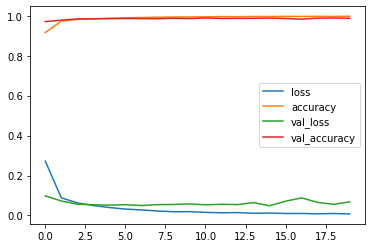

In [53]:
import pandas as pd
display(pd.DataFrame(model.history.history))
pd.DataFrame(model.history.history).plot()

In [32]:
ypred = model.predict(xtest)

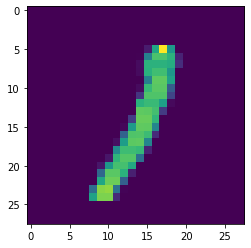

   The Actual Label At Index(3092) 1
    Predicted Value At Index(3092) 1 


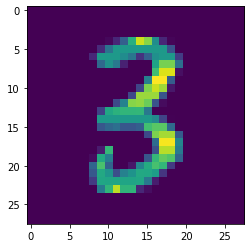

   The Actual Label At Index(1442) 3
    Predicted Value At Index(1442) 3 


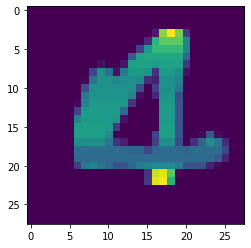

   The Actual Label At Index(5888) 4
    Predicted Value At Index(5888) 4 


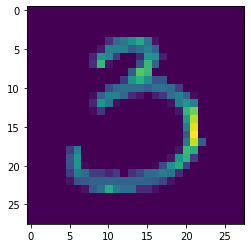

   The Actual Label At Index(3138) 3
    Predicted Value At Index(3138) 3 


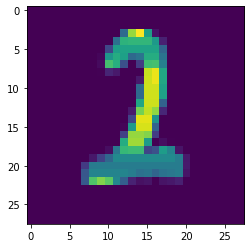

   The Actual Label At Index(8069) 2
    Predicted Value At Index(8069) 2 


In [69]:
for j in range(5):
    i = choice(range(10000))
    plt.imshow(xtest[i])
    plt.show()    
    stmnt=f'''the actual label at index({i}) {ytest[i]}
    predicted value at index({i}) {np.argmax(ypred[i])}'''.title()
    statement(stmnt)

# The first model

In [70]:
test_loss, test_acc = model.evaluate(xtest,ytest)
statement(f'test loss on {len(xtest)} test samples {test_loss}'.title())
statement(f'validation accuracy on {len(xtest)} test samples {test_acc*100}'.title())

313/313 [==============================] - 2s 8ms/step - loss: 0.0680 - accuracy: 0.9874
   Test Loss On 10000 Test Samples 0.06801015883684158 
   Validation Accuracy On 10000 Test Samples 98.73999953269958 


In [34]:
model.save('./Digit Identification/model')

INFO:tensorflow:Assets written to: ./Digit Identification/model\assets


In [56]:
batch_size = 128
num_classes = 10
epochs = 10

(xtrain1, ytrain1), (xtest1, ytest1) = mnist.load_data()
print(xtrain1.shape, ytrain1.shape)

xtrain1 = xtrain1.reshape(xtrain1.shape[0], 28, 28, 1)
xtest1 = xtest1.reshape(xtest1.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

ytrain1 = tf.keras.utils.to_categorical(ytrain1, num_classes)
ytest1 = tf.keras.utils.to_categorical(ytest1, num_classes)
xtrain1 = xtrain1.astype('float32')
xtest1 = xtest1.astype('float32')
xtrain1 /= 255
xtest1 /= 255
print('xtrain1 shape:', xtrain1.shape)
print(xtrain1.shape[0], 'train samples')
print(xtest1.shape[0], 'test samples')

(60000, 28, 28) (60000,)
xtrain1 shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# A model with 2 convolutional layers and 1 dense layer

In [57]:
model1 = Sequential([
(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=xtrain1.shape[1:])),
(Conv2D(64, (3, 3), activation='relu')),
(MaxPooling2D(pool_size=(2, 2))),
(Dropout(0.25)),
(Flatten()),
(Dense(256, activation='relu')),
(Dropout(0.5)),
(Dense(num_classes, activation='softmax')),
])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2359552   
                                                      

In [58]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# model.fit(xtrain1,ytrain1,epochs=5,validation_split=.3)
model1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model1.fit(xtrain1, ytrain1,batch_size=batch_size,epochs=20,verbose=1,validation_data=(xtest1, ytest1))

Epoch 1/20
469/469 [==============================] - 37s 78ms/step - loss: 2.2818 - accuracy: 0.1512 - val_loss: 2.2304 - val_accuracy: 0.4517
Epoch 2/20
469/469 [==============================] - 37s 80ms/step - loss: 2.1956 - accuracy: 0.3250 - val_loss: 2.1238 - val_accuracy: 0.6498
Epoch 3/20
469/469 [==============================] - 36s 77ms/step - loss: 2.0811 - accuracy: 0.4668 - val_loss: 1.9791 - val_accuracy: 0.6954
Epoch 4/20
469/469 [==============================] - 35s 75ms/step - loss: 1.9249 - accuracy: 0.5538 - val_loss: 1.7794 - val_accuracy: 0.7271
Epoch 5/20
469/469 [==============================] - 35s 75ms/step - loss: 1.7202 - accuracy: 0.6108 - val_loss: 1.5276 - val_accuracy: 0.7612
Epoch 6/20
469/469 [==============================] - 36s 77ms/step - loss: 1.4863 - accuracy: 0.6519 - val_loss: 1.2624 - val_accuracy: 0.7844
Epoch 7/20
469/469 [==============================] - 37s 79ms/step - loss: 1.2693 - accuracy: 0.6817 - val_loss: 1.0345 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,2.281823,0.151150,2.230366,0.4517
1,2.195618,0.325033,2.123793,0.6498
2,2.081069,0.466833,1.979074,0.6954
3,1.924878,0.553767,1.779431,0.7271
4,1.720222,0.610767,1.527583,0.7612
5,1.486287,0.651883,1.262394,0.7844
6,1.269271,0.681717,1.034491,0.8085
7,1.096375,0.708717,0.865163,0.8240
8,0.971018,0.726183,0.746235,0.8382
9,0.871682,0.750283,0.661999,0.8481


<AxesSubplot:>

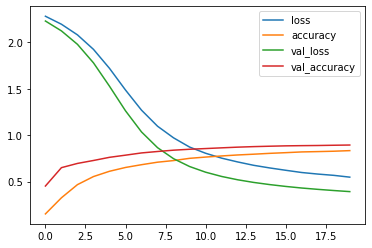

In [61]:
display(pd.DataFrame(model1.history.history))
pd.DataFrame(model1.history.history).plot()

# Second model

In [26]:
model1.save('./Digit Identification/tkinter_model')

INFO:tensorflow:Assets written to: tkinter_model\assets


In [63]:
def predict(file,model,frame_speed=1):
    preds = []
    ext = file.split('.')[-1]
    if ext in 'mp4,ts'.split(','):
        font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
        size = 1.5

        vid = cv2.VideoCapture(file)

        if not vid.isOpened():
            vid = cv2.VideoCapture(0)
        if not vid.isOpened():
            raise IOError('File Not Open')

        text = 'some text in a box!'.title()
        text_width,text_height=cv2.getTextSize(text,font,fontScale=size,thickness=1)[0]


        counter = 0
        while True:
            ret, frame = vid.read()
            counter+=1;
            if (counter%frame_speed)==0:
                try:
                    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                except:
                    break
                resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

                # txt_off_x = 5
                # txt_off_y = gray.shape[0]-25
                # box = ((txt_off_x,txt_off_y), (txt_off_x+text_width+1,txt_off_y-text_height-5))

                img = tf.keras.utils.normalize(resized)
                img = np.array(img).reshape(-1,28,28,1)
                pred = model.predict(img)
                status = np.argmax(pred)
                # print(status)
                # print(type(status))
                preds.append(status)
                x1,y1,w1,h1 = 0,0,175,175
                cv2.rectangle(frame,(x1,x1),(x1+100,y1+100),(0,0,0),-1)
                cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,.7,(0,0,255),2)

                cv2.imshow('handwritten digits recognition',frame)

                if cv2.waitKey(2)&0xFF==ord('q'):
                    break
        vid.release()
        cv2.destroyAllWindows()
        return preds
    
    elif ext in 'png,jpeg'.split(','):
        img = cv2.imread(file)
        plt.imshow(img)
        plt.show()
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.show()
        img = cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
        plt.imshow(img)
        plt.show()
        img = tf.keras.utils.normalize(img)
        img = np.array(img).reshape(-1,28,28,1)
        pred = model.predict(img)
        print('the model identified the digit in the image as'.title(),end='')
        statement(np.argmax(pred))

# A small demonsteration

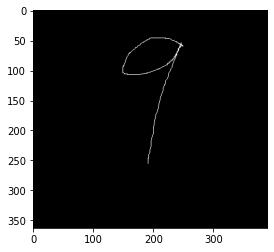

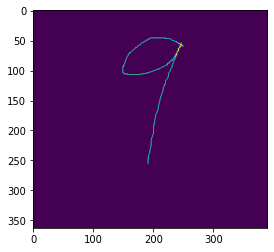

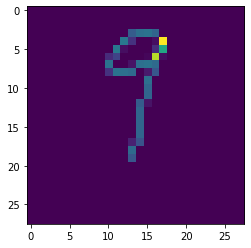

The Model Identified The Digit In The Image As   1 


In [64]:
predict('./myImage/9.png',model,frame_speed=1)

In [65]:
li = predict('./myImage/2022-02-02-18-10-28.mp4',model)
li

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 7,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 3,
 3,
 3,
 5,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 2,
 3,
 2,
 2,
 2,
 5,
 5,
 5,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
